In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"
import pingouin as pg

In [2]:
# load data
path_remote = os.path.join('~', 'Dropbox', 'WoonJuPark', 'Projects', 'AuditoryMotionRF')
path_datatable = os.path.join(path_remote, 'datatable')
datapath = os.path.join(path_datatable, 'Thresholds.csv')
thresholds = pd.read_csv(datapath)

In [3]:
def mag2db( factor ):
    import numpy as np
    mag = 20 * np.log10(factor)
    return mag

In [4]:
# convert factor to magnitude
thresholds[['AvgAlldb','AvgLastdb']] = mag2db(thresholds[['AvgAll', 'AvgLast']]) - mag2db(0.5)

In [5]:
# choose colors
colorpalette = ["seagreen", "rebeccapurple"]

# figure - all

/var/folders/dm/rs68_nt90vvg9gxchlf5zjqc0000gn/T/ipykernel_8296/3165113154.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="group", y="AvgAlldb", data=thresholds, order=["SC","EB"], alpha=.75, ax=axs[0], palette=colorpalette,
/opt/homebrew/Cellar/jupyterlab/4.0.5/libexec/lib/python3.11/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/var/folders/dm/rs68_nt90vvg9gxchlf5zjqc0000gn/T/ipykernel_8296/3165113154.py:18: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="group", y="AvgLastdb", data=thresholds, order=["SC","EB"], alpha=.75, ax=axs[1], palette=colorpalette,
/opt/homebrew/Cellar/jupyterlab/4.0.5/libexec/lib/python3.11/site-packages/seaborn/categorical.py:1680: Use

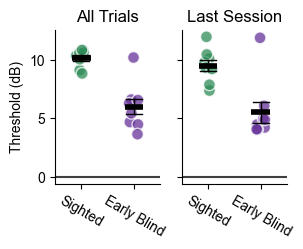

In [6]:
f, axs = plt.subplots(1,2,sharey=True)
f.set_size_inches(3, 2)

axs[0].axhline(y=0, color=".25")
sns.stripplot(x="group", y="AvgAlldb", data=thresholds, order=["SC","EB"], alpha=.75, ax=axs[0], palette=colorpalette,
             edgecolor='white', linewidth=1, size=8.5, zorder=1, marker='o')
sns.pointplot(x="group", y="AvgAlldb", data=thresholds, order=["SC","EB"], errorbar=('ci', 68), scale=2, markers='_',
              errwidth=1, capsize=0.3, color='0', join=False, ax=axs[0])

plt.subplot(1,2,1)
plt.ylabel('Threshold (dB)', fontsize=10);
plt.xlabel('');
plt.xticks([0, 1], ['Sighted', 'Early Blind'], rotation=-30)
plt.yticks([0, 5, 10], ['0', '5', '10'])
plt.title('All Trials')

axs[1].axhline(y=0, color=".25")
sns.stripplot(x="group", y="AvgLastdb", data=thresholds, order=["SC","EB"], alpha=.75, ax=axs[1], palette=colorpalette,
             edgecolor='white', linewidth=1, size=8.5, zorder=1, marker='o')
sns.pointplot(x="group", y="AvgLastdb", data=thresholds, order=["SC","EB"], errorbar=('ci', 68), scale=2, markers='_',
              errwidth=1, capsize=0.3, color="0", join=False, ax=axs[1])

plt.subplot(1,2,2)
plt.ylabel('');
plt.xlabel('');
plt.xticks([0, 1], ['Sighted', 'Early Blind'], rotation=-30)
plt.yticks([0, 5, 10], ['0', '5', '10'])
plt.title('Last Session')

sns.despine()

plt.savefig('thresholds.pdf', dpi=300, transparent=True, bbox_inches="tight")

# figure - threshold by session

In [7]:
datapath_long = os.path.join(path_datatable, 'Thresholds_long.csv')
thresholds_long = pd.read_csv(datapath_long)
thresholds_long['db'] = mag2db(thresholds_long['threshold']) - mag2db(0.5)

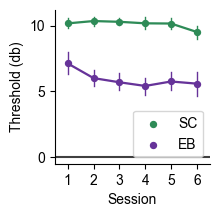

In [8]:
f = plt.figure()
f.set_size_inches(2, 2)
ax = f.add_subplot(111)
sns.pointplot(data=thresholds_long, x='block', y='db', hue='group', errorbar=('ci', 68), 
              palette=colorpalette, hue_order=['SC','EB'], scale=0.6, errwidth=1)
sns.despine()
ax.axhline(y=0, color=".25")
plt.xlabel('Session', fontsize=10)
plt.ylabel('Threshold (db)', fontsize=10)
plt.yticks([0, 5, 10], ['0', '5', '10'])
plt.legend(loc='lower right', title=None)
plt.savefig('thresholds_by_session.pdf', dpi=300, transparent=True, bbox_inches="tight")

# stats

In [9]:
# all trials
x1 = thresholds.loc[thresholds["group"]=="EB"]["AvgAlldb"]
y1 = thresholds.loc[thresholds["group"]=="SC"]["AvgAlldb"]
pg.ttest(x1,y1)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.473466,14,two-sided,0.000082,"[-5.8, -2.53]",2.736733,223.141,0.999063


In [10]:
# group * sess
pg.mixed_anova(data=thresholds_long, dv='db', within='block', subject='sub', between='group')

/opt/homebrew/Cellar/jupyterlab/4.0.5/libexec/lib/python3.11/site-packages/pingouin/parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,group,422.209164,1,14,422.209164,30.702333,0.000073,NaN,0.686817,NaN,NaN,NaN,NaN
1,block,11.196078,5,70,2.239216,2.236652,0.060080,0.139219,0.137753,0.361432,False,0.003273,4.177887e-10
2,Interaction,7.832835,5,70,1.566567,1.564774,0.181396,NaN,0.100533,NaN,NaN,NaN,NaN
